In [1]:
from mimic.utilities.utilities import set_all_seeds
from mimic.utilities.utilities import plot_gLV
# from mimic.model_infer import *
from mimic.model_simulate import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


## Simulate some time course data from the CRM

The McArthur Consumer Resource Model takes the form


$$ dN_i/dt = 1/\tau_i N_i (\sum_a(c_{ia} w_a R_a - m_i)) $$
$$ dR_a/dt = 1/(r_a K_a) (K_a - R_a) R_a - \sum_i(N_i c_{ia} R_a) $$

where:
-   $N_i$ is the concentration of a species
-  $R_a$ is the concentration of a resource
-  $c_{ia}$ is the preference of species $i$ for resource $a$
- $w_a$ is the quality of resource $a$
-  $m_i$ is the mortality rate of species $i$
- $K_a$ is the carrying capacity of resource $a$
- $\tau_i$ is the timescale of species $i$
- $r_a$ is the timescale of resource $a$

### Model with five species

In [9]:
set_all_seeds(1234)

num_species = 2
num_resources = 2
times = np.arange(0, 10, 0.1)

# species timescales
tau = np.random.uniform(0.1, 1.0, num_species)

# resource quality
w = np.random.uniform(0.1, 1.0, num_resources)

# relative resource preferences
c = np.random.uniform(0.1, 1.0, (num_species, num_resources))

# mortality rates
m = np.random.uniform(0.1, 1.0, num_species)

# resource timescales
r = np.random.uniform(0.1, 1.0, num_resources)

# resource carrying capacities
K = np.random.uniform(1.0, 10.0, num_resources)

# write the mu, M, epsilon, and pert_fn to a dictionary and pickle
params = {'num_species': num_species, 'num_resources': num_resources, 'tau': tau, 'w': w, 'c': c, 'm': m, 'r': r, 'K': K}
pd.to_pickle(params, 'params-s5.pkl')


### Simulate single time course

Model parameters:
Model: CRM
num_species: 2
num_resources: 2
tau: [0.27 0.66]
w: [0.49 0.81]
c: [[0.8  0.35]
 [0.35 0.82]]
m: [0.96 0.89]
r: [0.42 0.55]
K: [7.15 7.41]


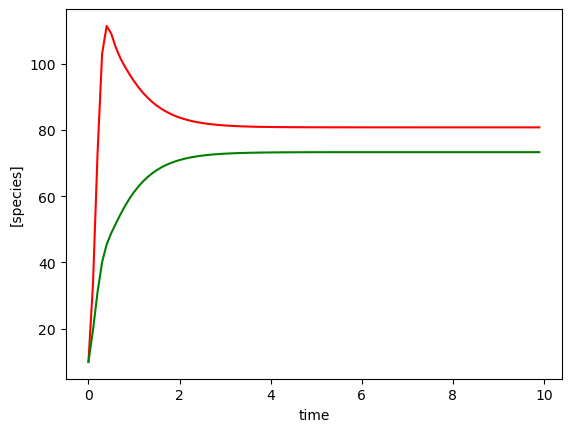

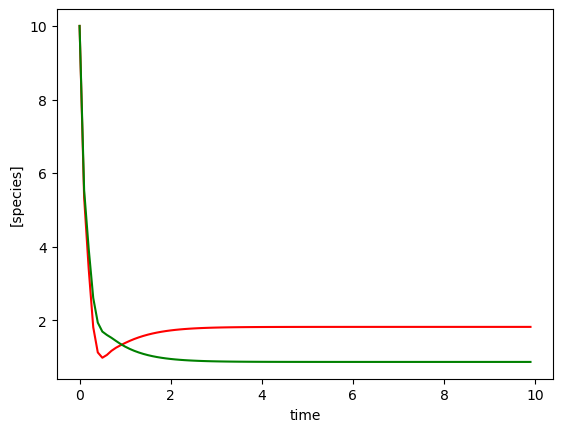

In [12]:
from mimic.model_simulate.sim_CRM import sim_CRM

# initial conditions
init_species = 10 * np.ones(num_species+num_resources)

# instantiate simulator
simulator = sim_CRM(num_species=num_species,
                    num_resources=num_resources)

simulator.set_parameters(num_species = params['num_species'],
                         num_resources = params['num_resources'],
                         tau = params['tau'],
                         w = params['w'],
                         c = params['c'],
                         m = params['m'],
                         r = params['r'],
                         K = params['K'])

simulator.print_parameters()

yobs, sobs = simulator.simulate(times, init_species)
 
# plot species simulation
plot_gLV(yobs, times)

# plot resources simulation
plot_gLV(sobs, times)
